# ⚠️ Anomaly Detection using Top 3 ML Methods

This notebook demonstrates how to detect anomalies using:

1. **Isolation Forest**
2. **One-Class SVM**
3. **Local Outlier Factor (LOF)**

We will use synthetic data with injected outliers and visualize how each method performs.


# Install the Packages


1.   scikit-learn
2.   matplotlib
3.   numpy



In [1]:
pip install scikit-learn matplotlib numpy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

## 📊 Step 1: Generate Synthetic Data

- We'll create a cluster of normal data points using `make_blobs()`.
- Then, we'll add some uniformly random outliers to simulate anomalies.


In [8]:
X_normal, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.60, random_state=42)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X_normal, X_outliers])  # Combine normal data + outliers

## 🌲 Step 2: Apply Isolation Forest

Isolation Forest isolates anomalies by randomly splitting features. Anomalies get isolated quickly due to their uniqueness.


In [9]:
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_preds = iso_model.fit_predict(X)  # -1 = anomaly, 1 = normal

## 📉 Step 3: Apply One-Class SVM

One-Class SVM finds a boundary around normal data points. Anything outside the boundary is treated as an anomaly.


In [13]:
svm_model = OneClassSVM(kernel="rbf", nu=0.1, gamma="scale")
svm_model.fit(X)
svm_preds = svm_model.predict(X)  # -1 = anomaly, 1 = normal

## 🧭 Step 4: Apply Local Outlier Factor (LOF)

LOF detects outliers based on their local density compared to their neighbors.


In [12]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_preds = lof_model.fit_predict(X)  # -1 = anomaly, 1 = normal

## 🖼️ Step 5: Visualize Results

We’ll now plot the data and highlight detected anomalies (in red) and normal points (in green) for all three models.


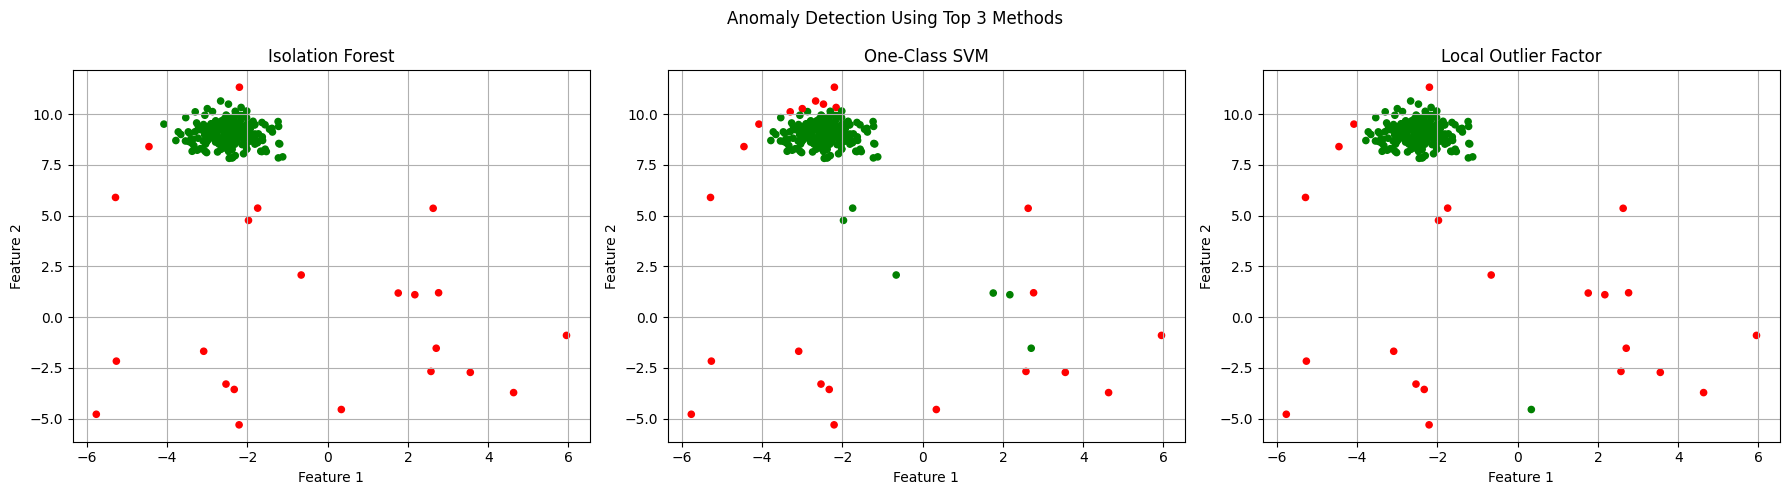

In [14]:
models = {
    "Isolation Forest": iso_preds,
    "One-Class SVM": svm_preds,
    "Local Outlier Factor": lof_preds
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, preds) in zip(axes, models.items()):
    ax.scatter(X[:, 0], X[:, 1], c=np.where(preds == -1, 'red', 'green'), s=20)
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.suptitle("Anomaly Detection Using Top 3 Methods")
plt.tight_layout()
plt.show()